### Previous: <a href = "keras_04.ipynb">1.4 Basic model of a network</a>

# <center> Keras </center>
## <center>1.5 Overfitting VS generalization</center>

# Explanation

### Overfitting
Overfitting refers to a model that models the training data too well.<br>

Overfitting happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data. This means that the noise or random fluctuations in the training data is picked up and learned as concepts by the model. The problem is that these concepts do not apply to new data and negatively impact the models ability to generalize.

<br> <br>




<img src="https://i.stack.imgur.com/13vdb.png" width = "70%" /><br>
There have only been 56 presidential elections and 43 presidents. That is not a lot of data to learn from. When the predictor space expands to include things like having false teeth and the Scrabble point value of names, it's pretty easy for the model to go from fitting the generalizable features of the data (the signal) and to start matching the noise. When this happens, the fit on the historical data may improve, but the model will fail miserably when used to make inferences about future presidential elections.
<br> <br>

Here's a graph which illustrates overfitting: 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/19/Overfitting.svg/685px-Overfitting.svg.png
" width = "40%" /><br>

The black graph represents the desired accuracy, whereas the green graph looks too much into detail, thus adapts too much to the training data.

<br>
### Generalization


Generalization refers to how well the concepts learned by a machine learning model applys to specific examples not seen by the model when it was learning.



In [1]:
#previously done
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import SGD, Adam, Adamax
from keras.utils.vis_utils import model_to_dot
from keras.datasets import mnist
from keras.utils import np_utils
%matplotlib inline
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG
#Load MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#Reshape
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
#Split
X_train = X_train[0:10000]
X_test = X_test[0:1000]
Y_train = Y_train[0:10000]
Y_test = Y_test[0:1000]

def plot_training_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    #loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Using TensorFlow backend.


# Example

Train on 10000 samples, validate on 1000 samples
Epoch 1/25
10000/10000 [==============================] - 3s 334us/step - loss: 0.4628 - acc: 0.8712 - val_loss: 0.2621 - val_acc: 0.9150
Epoch 2/25
10000/10000 [==============================] - 3s 289us/step - loss: 0.1666 - acc: 0.9494 - val_loss: 0.2106 - val_acc: 0.9310
Epoch 3/25
10000/10000 [==============================] - 3s 288us/step - loss: 0.0972 - acc: 0.9706 - val_loss: 0.1702 - val_acc: 0.9350
Epoch 4/25
10000/10000 [==============================] - 3s 289us/step - loss: 0.0612 - acc: 0.9820 - val_loss: 0.1757 - val_acc: 0.9460
Epoch 5/25
10000/10000 [==============================] - 3s 290us/step - loss: 0.0325 - acc: 0.9920 - val_loss: 0.1466 - val_acc: 0.9540
Epoch 6/25
10000/10000 [==============================] - 3s 293us/step - loss: 0.0243 - acc: 0.9938 - val_loss: 0.1674 - val_acc: 0.9400
Epoch 7/25
10000/10000 [==============================] - 3s 287us/step - loss: 0.0132 - acc: 0.9970 - val_loss: 0.1442 - v

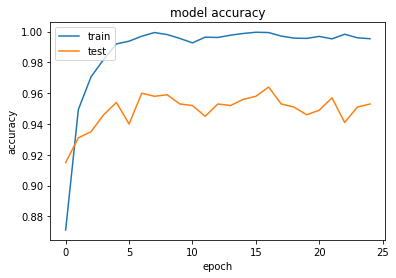

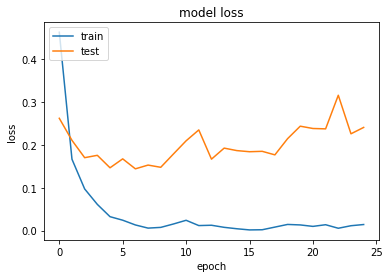

In [2]:
model = Sequential()
model.add(Dense(input_dim=28*28, units=500, activation='relu'))
model.add(Dense(units=500, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

BATCH_SIZE=100
NP_EPOCHS=25
history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NP_EPOCHS,
                    verbose=1, validation_data=(X_test, Y_test))
plot_training_history(history)

# Task
Should we in any case avoid overfitting? <br>


# Feedback

# Now we are trying to get the most out of our algorithm
### Next: <a href = "keras_06.ipynb">1.6 Increasing/Decreasing number of layers</a>